***
<div style="color: white; font-weight: bold; text-align: center; font-size: 45px; font-family: 'Times New Roman';">MODEL TRAINING WITH LIME</div>

***

<div id="introduction" style="color: magenta; font-weight: bold; font-size: 40px; font-family: 'Times New Roman';">INTRODUCTION TO LIME</div>

LIME (Local Interpretable Model-agnostic Explanations) is a model-agnostic method that explains the predictions of any classifier in an interpretable and faithful manner by learning an interpretable model locally around the prediction. It is a very powerful tool for explaining the predictions of any classifier, and it is widely used in the field of machine learning. LIME is a very useful tool for understanding the predictions of machine learning models and for debugging and improving the performance of machine learning models.

LIME focuses on training local surrogate models to explain individual predictions. Local surrogate models are interpretable models that are used to explain individual predictions of black box machine learning models. Surrogate models are trained to approximate the predictions of the underlying black box model. Instead of training a global surrogate model, LIME focuses on training local surrogate models.

LIME is model-agnostic, meaning that it can be applied to any machine learning model. The technique attempts to understand the model by perturbing the input of data samples and understanding how the predictions change.

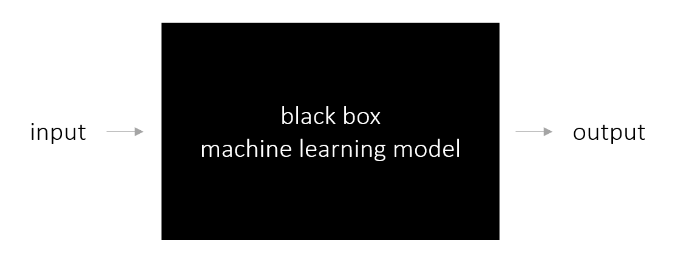


source: Click [here](https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime) to know more about LIME.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('.\dataset\gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
X = df.drop(labels=['id','price'],axis=1)
Y = df[['price']]

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
xtrain.shape

(154858, 9)

In [6]:
xtest.shape

(38715, 9)

#### `Performing preprocessing`

In [ ]:
import pickle
with open('E:/Gemstone Price Prediction/artifacts/preprocessor.pkl','rb') as file:
    preprocessor = pickle.load(file)

In [ ]:
xtrain_scaled = preprocessor.fit_transform(xtrain)
xtest_scaled = preprocessor.transform(xtest)

#### `Model Prediction`

In [ ]:
import pickle
with open('E:/Gemstone Price Prediction/artifacts/model.pkl','rb') as file:
    model = pickle.load(file)

In [ ]:
ytrain_pred = model.predict(xtrain_scaled)
ytest_pred = model.predict(xtest_scaled)

#### `Model Evaluation`

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)

# Printing the Evaluation results
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('\n----------------------------------\n')
    
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

#### `Model Interpretation with LIME`

In [ ]:
# Lime Explainer
from lime.lime_tabular import LimeTabularExplainer
features = list(preprocessor.get_feature_names_out())
explainer = LimeTabularExplainer(xtrain_scaled,
                                 feature_names=list(preprocessor.get_feature_names_out()), 
                                 class_names=['price'],
                                 verbose=True,
                                 mode='regression')

In [ ]:
# Choose the 6th instance and use it to predict the results and explain the model
#6th instance is the 5th index in the dataset helps to explain the model
j = 6
exp = explainer.explain_instance(xtest_scaled[j], model.predict, num_features=9)

In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()